Import all the functions from the other Jupyter notebooks

importing Jupyter notebook from truncated_epath_trees.ipynb


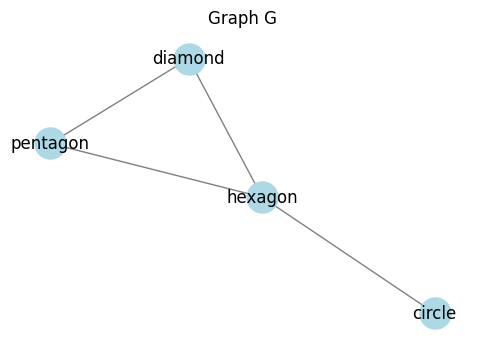

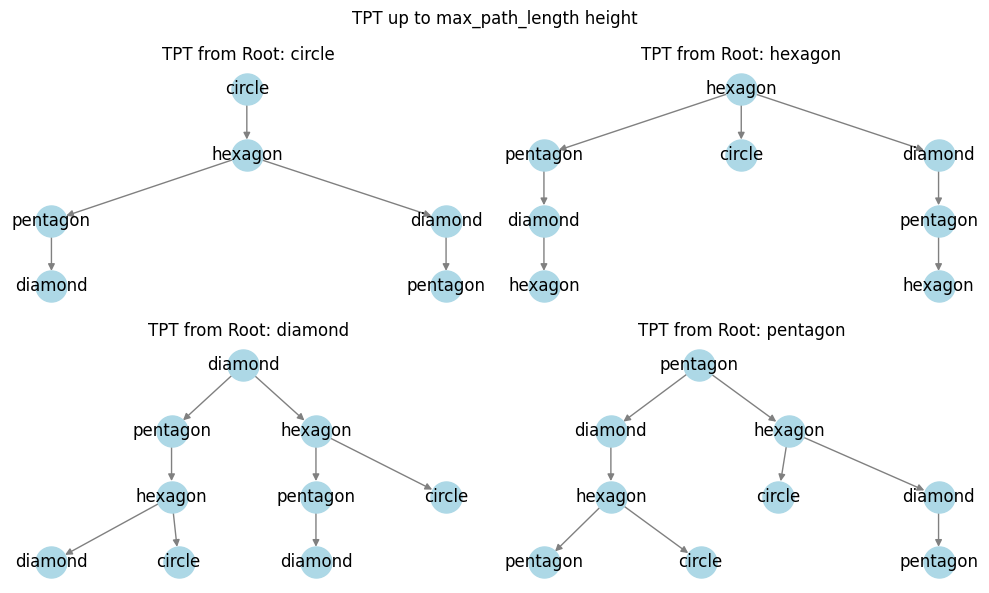

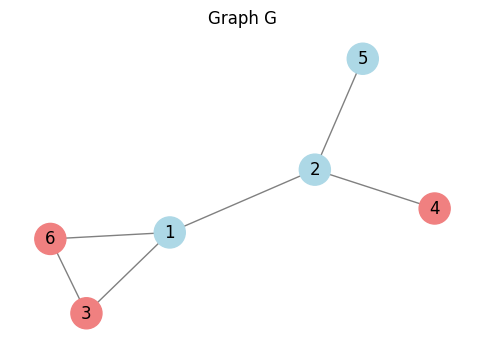

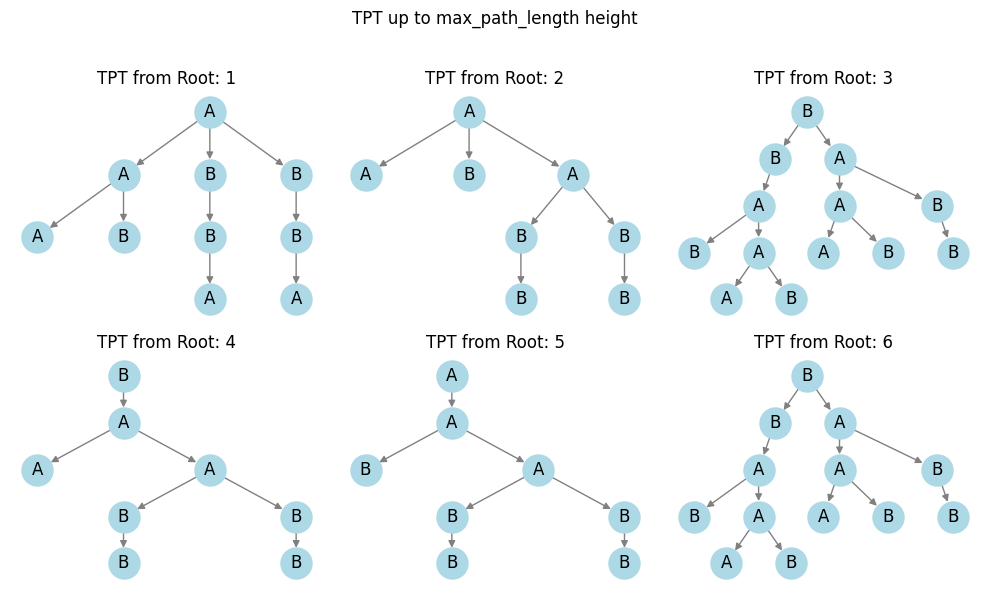

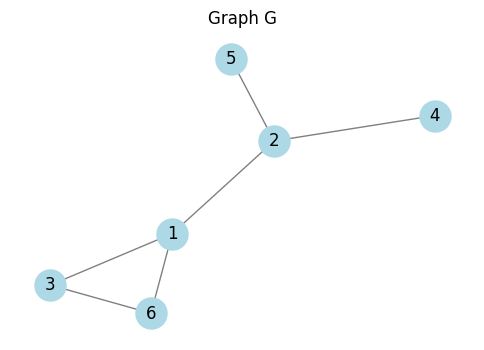

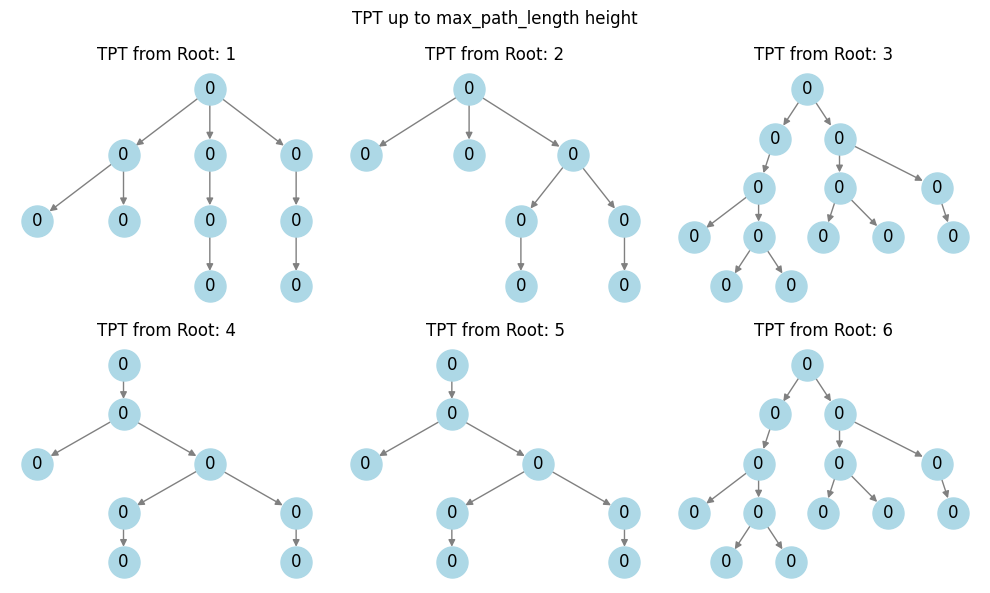

importing Jupyter notebook from k_redundant_trees.ipynb


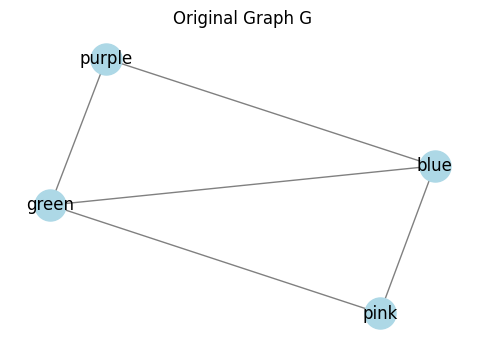

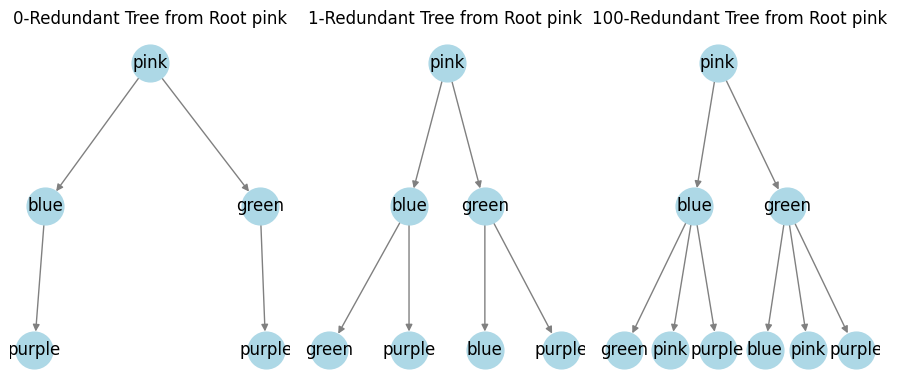

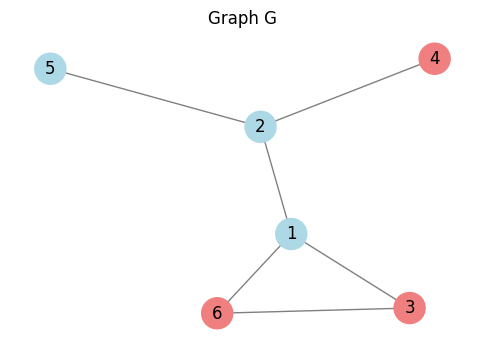

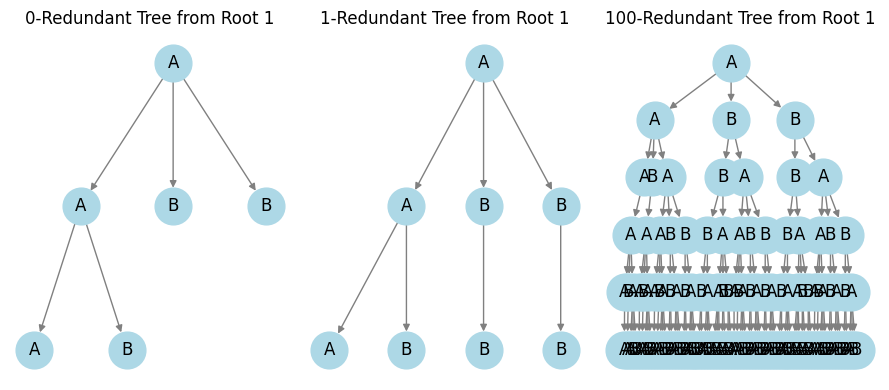

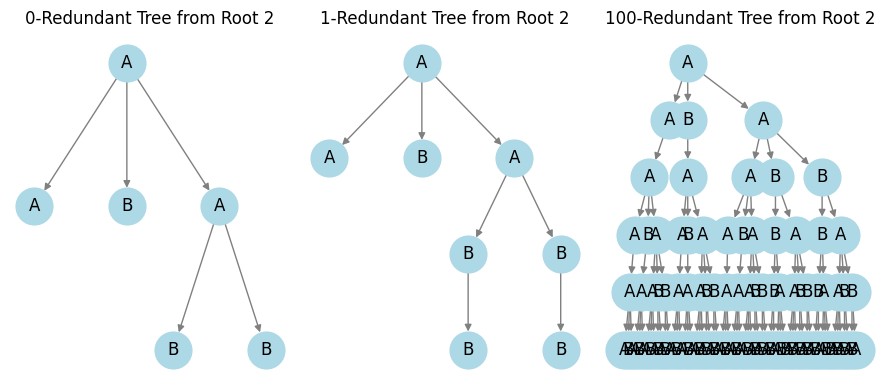

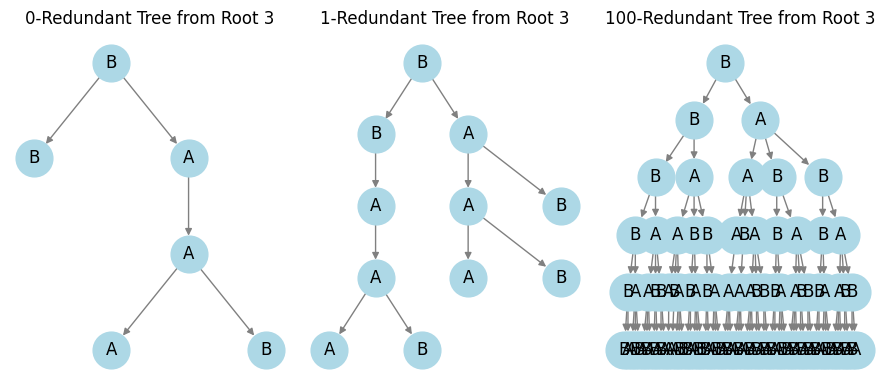

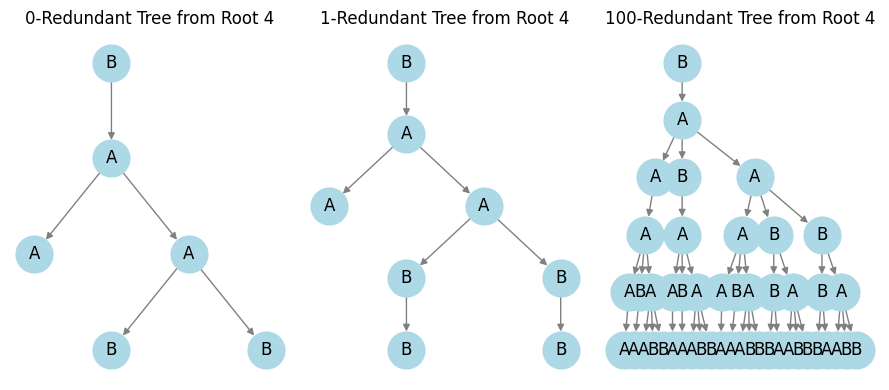

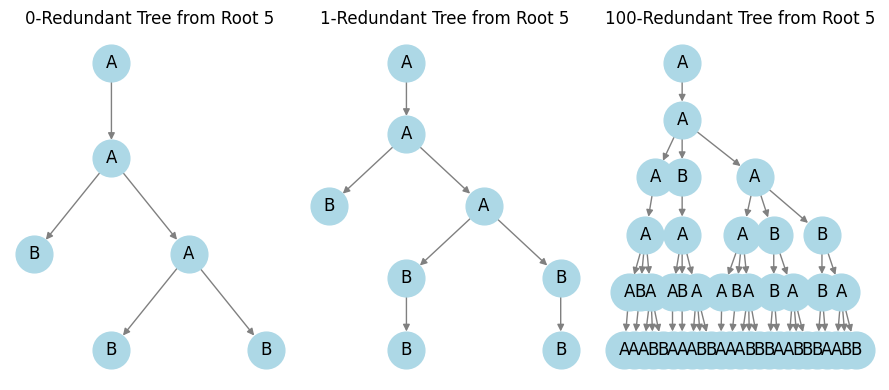

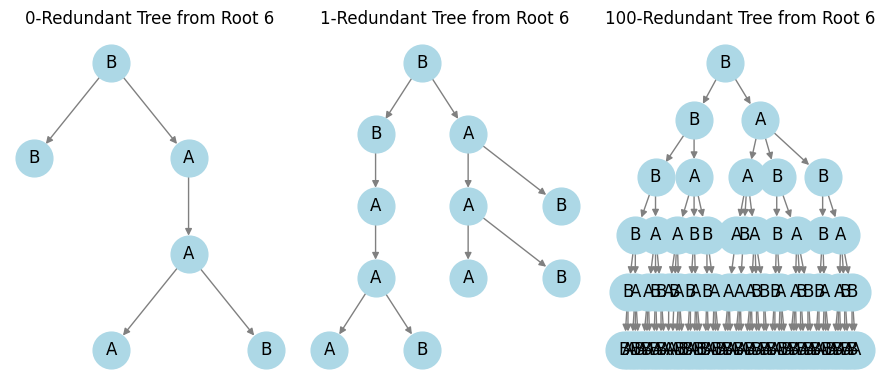

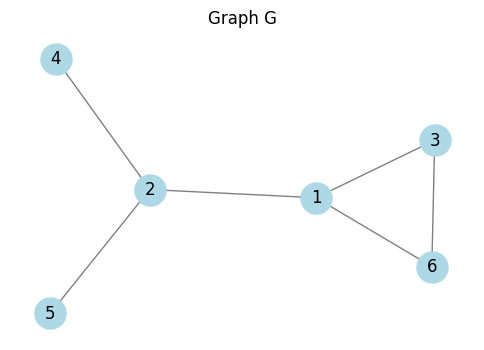

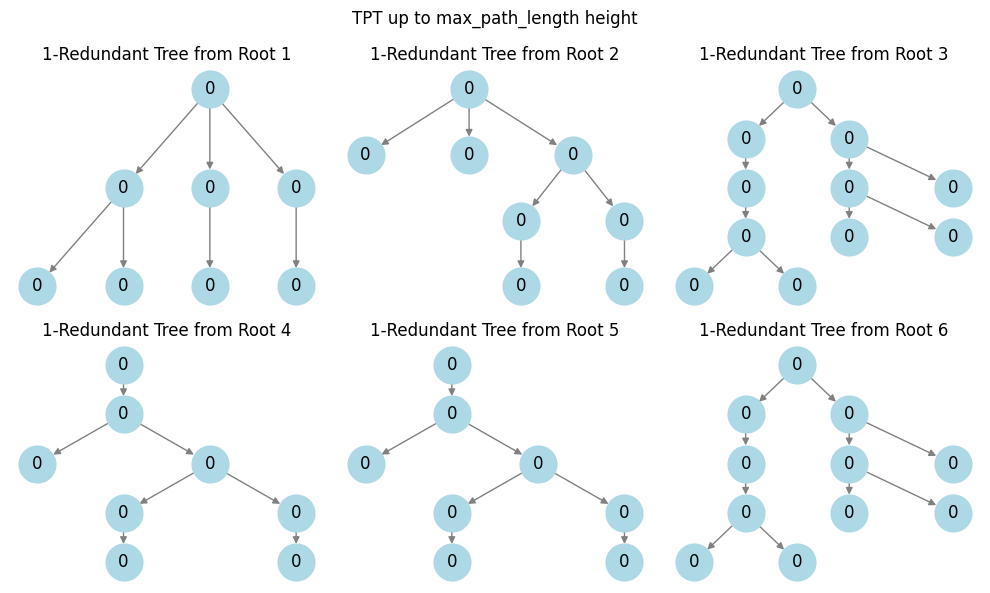

In [1]:
import import_ipynb
import truncated_epath_trees as tpt;
import k_redundant_trees as knt;
import networkx as nx
import matplotlib.pyplot as plt

## Radix sort the tree and canonicalized string encoding

In [2]:
def radix_sort(strings):
    '''Sort a list of strings using radix sort. All node labels must be passed in as strings.'''
    if not strings:
        return strings
    # Find the maximum length of any string in the list
    max_length = max(len(s) for s in strings)
    # Iterate over each digit position, starting from the least significant digit (rightmost)
    for i in range(max_length - 1, -1, -1):
        # Create 256 empty buckets for each ASCII character (0-255)
        buckets = [[] for _ in range(256)]      
        # Place each string into the appropriate bucket based on the current digit
        for s in strings:
            # If the current digit position is within the length of the string, use its ASCII value
            # Otherwise, treat it as 0 (or the minimum value)
            char = ord(s[i]) if i < len(s) else 0
            buckets[char].append(s)       
        # Reassemble the list from the buckets
        strings = [s for bucket in buckets for s in bucket] 
    return strings


def canonize_tree(tree):
    '''Recursively canonicalize the tree. No input necessary except the tree.'''
    def _canonize(node):
        '''Function to actually to the canonizing. Begins with the earliest node found and appends children as they're found.'''
        if not node:
            return ""
        # Need to get just the label of the node, not its unique identifier
        canonical_parts = [tree.node_labels[node]['name']]
        # Find the node's children
        children = tree.chi(node)
        if not children:
            return "".join(canonical_parts)
        # Recursively canonize the children
        child_canonizations = []
        for child in children:
            child_canonizations.append(_canonize(child) + "$")
        # Sort the children using radix sort
        sorted_child_canonizations = radix_sort(child_canonizations)
        # Add the sorted children's canonization to their parent's canonization
        canonical_parts.extend(sorted_child_canonizations)
        # We've reached through all the children so we return to step back out and continue the recursion
        return "".join(canonical_parts)

    # Start with the root of the tree, defined in this get_root function in kNT and TPT classes
    root = tree.get_root()
    return _canonize(root)

## Comparison where knTree and TPT should be equal

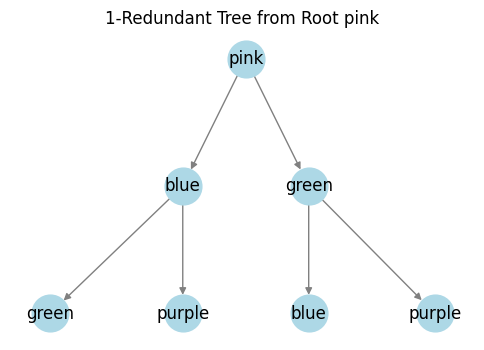

2


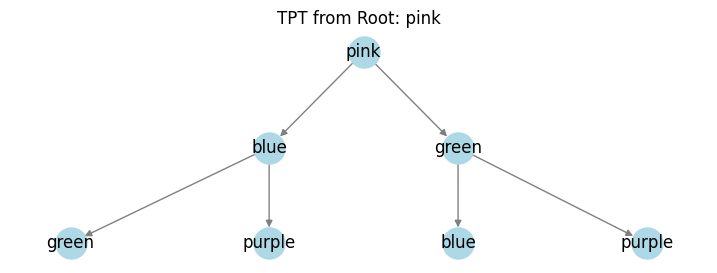

pinkbluegreen$purple$$greenblue$purple$$
pinkbluegreen$purple$$greenblue$purple$$
True


In [3]:
# Create the adjacency list for the graph
adjacency_list = {
    'pink': ['green', 'blue'],
    'green': ['blue', 'purple'],
    'blue': ['purple'],
    'purple': []
}

# Initialize the graph and convert to two-direction adjacency list
# The Graph class from knt and tpt are identical so either works
# I should probably just make another page for a Graph class, but that would be better in a python file than a Jupyter notebook anyway so it is a later task
G1 = knt.Graph(adjacency_list)
G1.adjacency_list = G1.two_direction_adj_list()

# Set parameters for kNT
w = 'pink'
h = 2
k = 1

# Build 1-NT from graph
T1 = knt.kNT(G1, w, k, h)
T1.plot_tree()

# Build TPT from graph
T2 = tpt.TPT(G1, w, h)
print(T2.max_depth)
T2.plot_tree()

# Canonize both trees and compare
tc1 = canonize_tree(T1)
tc2 = canonize_tree(T2)
print(tc1)
print(tc2)
print(tc1 == tc2) # Returns True

## Testing to make sure shuffled siblings yield the same canonization

I was struggling to do any sort of function that would randomly switch siblings and I kept ending up with the original tree, so I instead manually created a tree that has the leaf nodes in a different order so I could test this.

Original Tree:


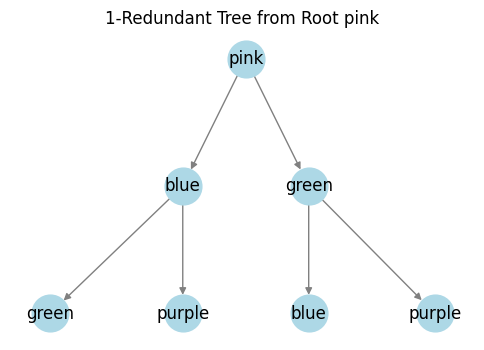

Shuffled Tree:


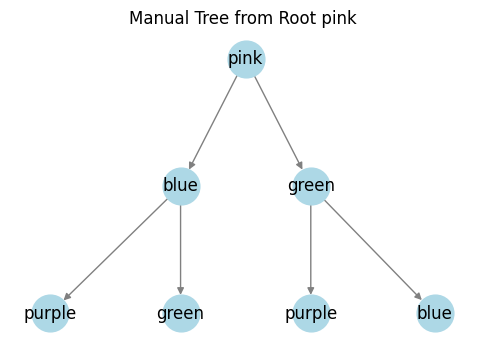

pinkbluegreen$purple$$greenblue$purple$$
pinkbluegreen$purple$$greenblue$purple$$
True


In [34]:
class ManualTree:
    def __init__(self, root, vertices, edges):
        self.root = root
        self.vertices = vertices
        self.edges = edges
        self.node_labels = {node: {'name': node.split('_')[0]} for node in vertices}
        self.unfolding_tree = nx.DiGraph()
        self.build_tree()

    def build_tree(self):
        # Add nodes to the unfolding_tree
        for node in self.vertices:
            self.unfolding_tree.add_node(node, label=self.node_labels[node]['name'])
        
        # Add edges to the unfolding_tree
        for parent, child in self.edges:
            self.unfolding_tree.add_edge(parent, child)

    def get_root(self):
        return self.root
    
    def print_tree(self):
        '''Print the tree as text.'''
        print("Tree Structure:")
        for parent, children in self.vertices.items():
            print(f"Parent: {self.node_labels[parent]['name']}")
            if children:
                child_names = [self.node_labels[child]['name'] for child in children]
                print(f"Children: {child_names}")
            else:
                print("No Children")
            print("-" * 20)
    
    def plot_tree(self):
        '''Plot the tree on its own plot.'''
        fig, ax = plt.subplots(figsize=(6, 4))
        pos = nx.drawing.nx_agraph.graphviz_layout(self.unfolding_tree, prog='dot')  # Tree layout
        node_labels = {node: self.node_labels[node]['name'] for node in self.unfolding_tree.nodes()}        
        nx.draw(self.unfolding_tree, pos, ax=ax, labels=node_labels, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700)
        ax.set_title(f'Manual Tree from Root {self.root}')
        plt.show()

    def chi(self, node):
        return self.vertices[node]

# Manually define the vertices and edges for the tree
vertices = {
    'pink': ['blue_1', 'green_1'],
    'blue_1': ['purple_2_blue_1', 'green_2_blue_1'],
    'green_1': ['purple_2_green_1', 'blue_2_green_1'],
    'purple_2_blue_1': [],
    'green_2_blue_1': [],
    'purple_2_green_1': [],
    'blue_2_green_1': [],
}

edges = [
    ('pink', 'blue_1'),
    ('pink', 'green_1'),
    ('blue_1', 'purple_2_blue_1'),
    ('blue_1', 'green_2_blue_1'),
    ('green_1', 'purple_2_green_1'),
    ('green_1', 'blue_2_green_1')
]

# Create the tree with the specified structure
manual_tree = ManualTree('pink', vertices, edges)

# Print and plot the original tree
print("Original Tree:")
# T1.print_tree()
T1.plot_tree()

# Print and plot the shuffled tree
print("Shuffled Tree:")
manual_tree.plot_tree()

# Canonize both trees and compare
tc1 = canonize_tree(T1)
tc1_shuffled = canonize_tree(manual_tree)
print(tc1)
print(tc1_shuffled)
print(tc1 == tc1_shuffled) # Returns True

## Testing on another small graph where we can visually analyze all the results. Only two labels for more than two nodes.

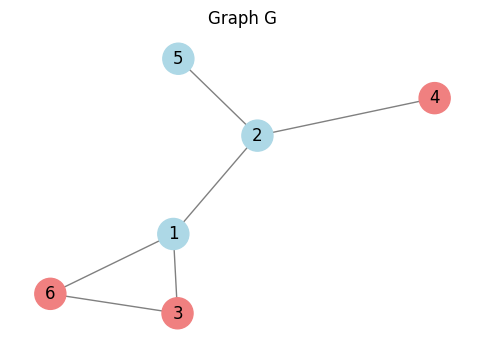

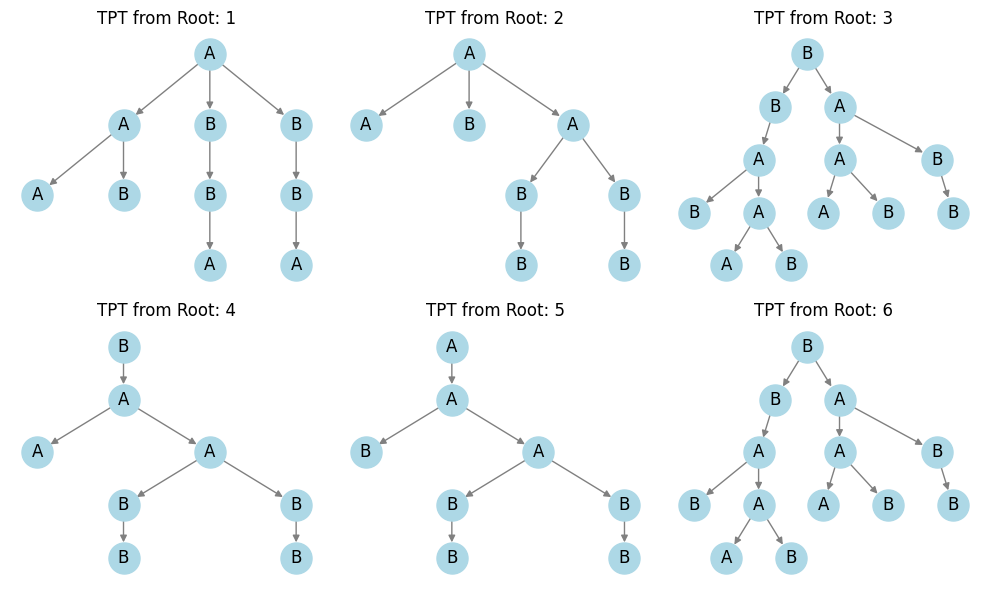

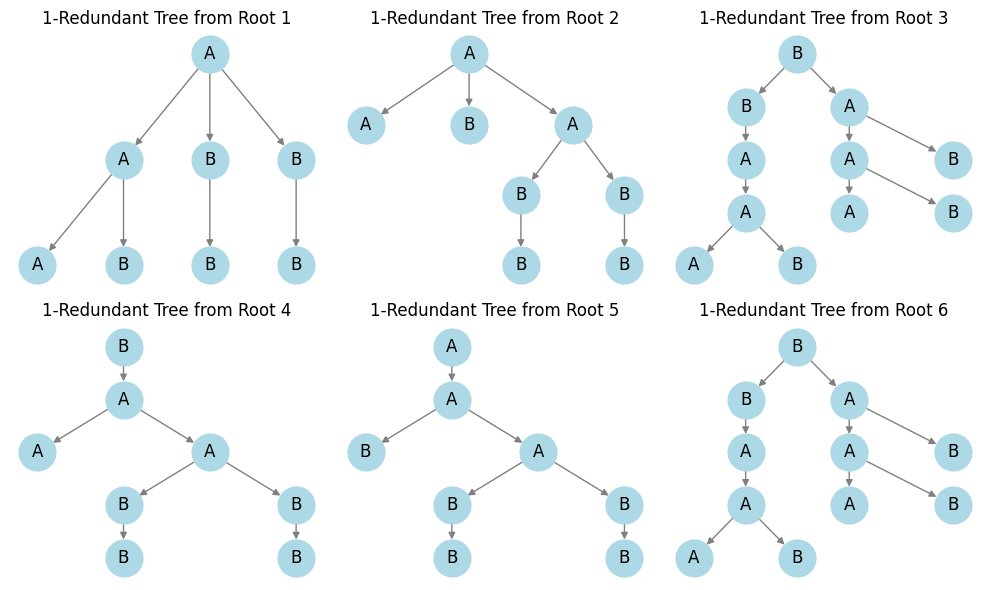

['AAA$B$$BBA$$$BBA$$$', 'AA$ABB$$BB$$$B$', 'BAAA$B$$BB$$$BAAA$B$$B$$$', 'BAA$ABB$$BB$$$$', 'AAABB$$BB$$$B$$', 'BAAA$B$$BB$$$BAAA$B$$B$$$']
['AAA$B$$BB$$BB$$', 'AA$ABB$$BB$$$B$', 'BAAA$B$$B$$BAAA$B$$$$', 'BAA$ABB$$BB$$$$', 'AAABB$$BB$$$B$$', 'BAAA$B$$B$$BAAA$B$$$$']


In [4]:
# Random adjacency list
adjacency_list = {
    '1': ['2', '3', '6'],
    '2': ['1', '4', '5'],
    '3': ['1', '6'],
    '4': ['2'],
    '5': ['2'],
    '6': ['3']
}

# Repeated node labels: A or B
node_labels = {
    '1': 'A',
    '2': 'A',
    '3': 'B',
    '4': 'B',
    '5': 'A',
    '6': 'B'
}

possible_roots = ['1', '2', '3', '4', '5', '6']

# Create graph
G = knt.Graph(adjacency_list)
G.adjacency_list = G.two_direction_adj_list()

# Give different colors to the different labels so we visually check the trees
node_colors = ['lightblue' if node_labels[node] == 'A' else 'lightcoral' for node in G.adjacency_list]

# Plotting the graph G
fig, ax = plt.subplots(figsize=(6, 4))
G_nx = nx.Graph(G.adjacency_list)
nx.draw(G_nx, with_labels=True, node_color=node_colors, edge_color='gray', node_size=500, ax=ax)
ax.set_title("Graph G")
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
tpts = []
for idx, root in enumerate(possible_roots):
    i, j = divmod(idx, 3)
    tpt1 = tpt.TPT(G, root)
    # Can comment these next two lines to make sure the unique identifiers are not incorrectly repeated
    for node in tpt1.tpt_tree.nodes():
        tpt1.node_labels[node]['name'] = node_labels[node.split('-')[-1]]
    canonized = canonize_tree(tpt1)
    tpts.append(canonized)
    tpt1.plot_tree_with_ax(axes[i, j])
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
knts = []
for idx, root in enumerate(possible_roots):
    i, j = divmod(idx, 3)
    k = 1
    tree_1 = knt.kNT(G, root, k)
    # Can comment these next two lines to make sure the unique identifiers are not incorrectly repeated
    for node in tree_1.unfolding_tree.nodes:
        tree_1.node_labels[node]['name'] = node_labels[node.split('_')[0]]
    canonized = canonize_tree(tree_1)
    knts.append(canonized)
    tree_1.plot_tree_with_ax(axes[i, j])
plt.tight_layout()
plt.show()

print(tpts)
print(knts)

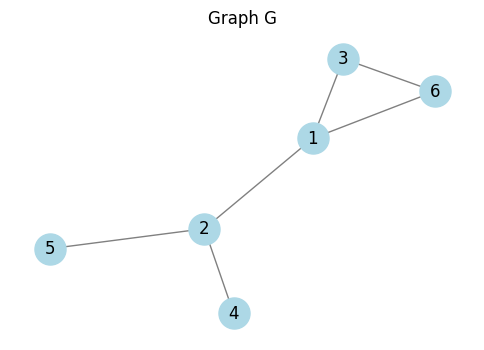

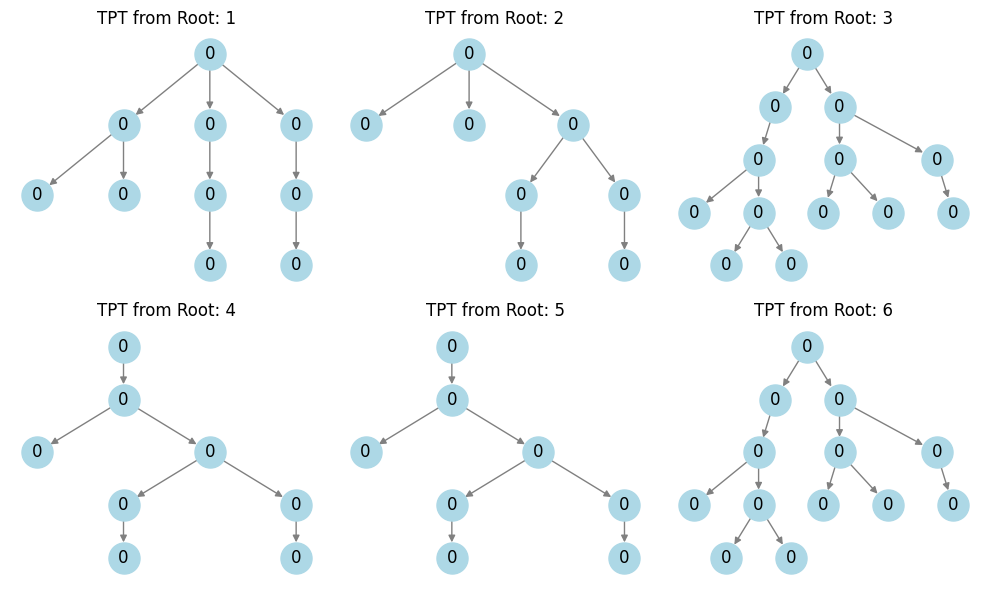

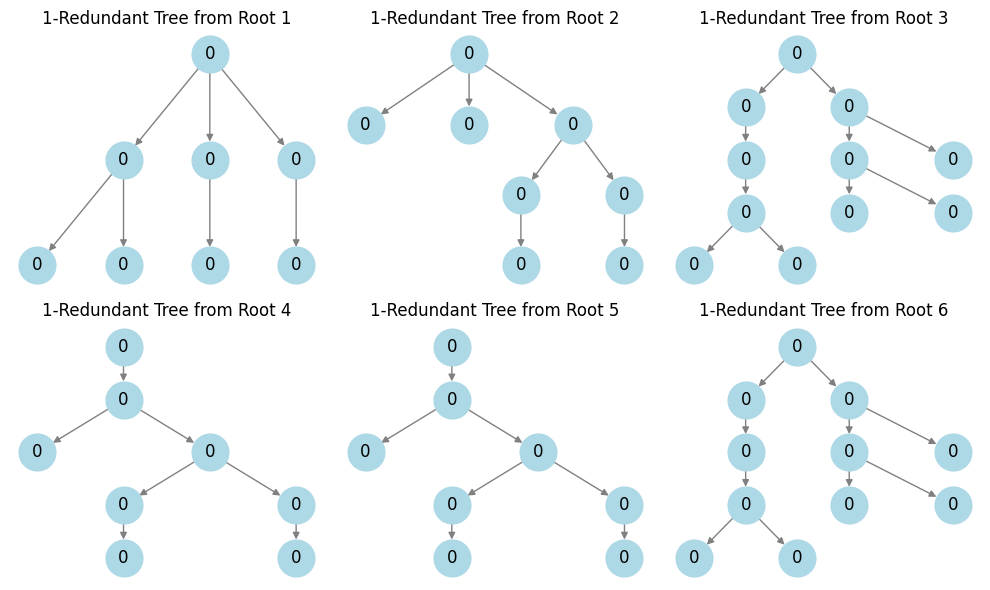

['000$0$$000$$$000$$$', '00$0$000$$00$$$', '0000$$00$0$$$000$00$0$$$$', '000$000$$00$$$$', '000$000$$00$$$$', '0000$$00$0$$$000$00$0$$$$']
['000$$00$$00$0$$', '00$0$000$$00$$$', '000$00$0$$$0000$0$$$$', '000$000$$00$$$$', '000$000$$00$$$$', '000$00$0$$$0000$0$$$$']


In [5]:
adjacency_list = {
    '1': ['2', '3', '6'],
    '2': ['1', '4', '5'],
    '3': ['1', '6'],
    '4': ['2'],
    '5': ['2'],
    '6': ['3']
}

possible_roots = ['1', '2', '3', '4', '5', '6']

G = knt.Graph(adjacency_list)
G.adjacency_list = G.two_direction_adj_list()

# Plotting the graph G
fig, ax = plt.subplots(figsize=(6, 4))
G_nx = nx.Graph(G.adjacency_list)
nx.draw(G_nx, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, ax=ax)
ax.set_title("Graph G")
plt.show()

# Plotting the TPTs
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
tpts = []
for idx, root in enumerate(possible_roots):
    i, j = divmod(idx, 3)
    tpt1 = tpt.TPT(G, root)
    # Can comment these next two lines to make sure the unique identifiers are not incorrectly repeated
    for node in tpt1.tpt_tree.nodes():
        # Treat all nodes as having the same label '0'
        tpt1.node_labels[node] = {'name': '0'}
    canonized = canonize_tree(tpt1)
    tpts.append(canonized)
    tpt1.plot_tree_with_ax(axes[i, j])
plt.tight_layout()
plt.show()

# Plotting the kNTs
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
knts = []
for idx, root in enumerate(possible_roots):
    i, j = divmod(idx, 3)
    k = 1
    tree_1 = knt.kNT(G, root, k)
    # Can comment these next two lines to make sure the unique identifiers are not incorrectly repeated
    for node in tree_1.unfolding_tree.nodes():
        # Treat all nodes as having the same label '0'
        tree_1.node_labels[node] = {'name': '0'}
    canonized = canonize_tree(tree_1)
    knts.append(canonized)
    tree_1.plot_tree_with_ax(axes[i, j])
plt.tight_layout()
plt.show()

print(tpts)
print(knts)